# create modified power spectra: $\partial P / \partial w_0,w_a = const$.

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


# preliminaries

In [2]:
# set cosmological parameters
# copied from FisherCl

cosParams = {
        'H0'    : None, #67.51, #setting H0=None allows cosmomc_theta to be used instead
        'cosmomc_theta'           : 1.04087e-2,
        'ombh2' : 0.02226,
        'omch2' : 0.1193,
        'omk'   : 0,
        'tau'   : 0.063,

        'As'    : 2.130e-9,
        'ns'    : 0.9653,
        'r'     : 0,
        'kPivot': 0.05,

        #'w'     : -1.0, # DARK ENERGY!!!
        'w'     : -0.95, # DARK ENERGY!!!
        'wa'    : 0.0,

        'mnu'   : 0.06, # (eV)
        'nnu'   : 3.046,
        'standard_neutrino_neff'  : 3.046,
        'num_massive_neutrinos'   : 1, #this param should be ignored except in degenerate hierarchy
        'neutrino_hierarchy'      : 'degenerate'}
        #'neutrino_hierarchy'      : 'normal'}

In [3]:
AccuracyBoost = 3
nonlinear = False #True
nz = 300000
nCosParams = 9 # 6 LCDM + Mnu + w0 + wa
paramList = ['ombh2','omch2','cosmomc_theta',  'As', 'ns','tau','mnu', 'w', 'wa']
#deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,0.025] #mnu one in eV
deltaP =    [ 0.0008, 0.0030,      0.0050e-2,0.1e-9,0.010,0.020,0.020,0.05,  0.1] #mnu one in eV

# cut deltaP in half to match Byeonghee's step sizes
deltaP = np.array(deltaP)/2.0

In [4]:
# modified param lists
myParamsUpper = []
myParamsLower = []
for cParamNum in range(nCosParams):
    # add parameter dictionary to lists; HAVE TO BE COPIES!!!
    myParamsUpper.append(cosParams.copy())
    myParamsLower.append(cosParams.copy())
    # modify parameter number cParamNum in ditionaries
    myParamsUpper[cParamNum][paramList[cParamNum]] += deltaP[cParamNum]
    myParamsLower[cParamNum][paramList[cParamNum]] -= deltaP[cParamNum]
print 'done.'

done.


In [5]:
# get fiducial P
myPk = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**cosParams)
print 'done.'

neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
done.


# get perturbed matter power spectra and build derivatives

In [6]:
#get-perturbed-matter-power-spectra-and-build-derivatives# get matter power spectra
# suppose that changing dark energy parameters (globally) does not affect already computed PK
# set return_z_k = True in cp.MatterPower.makePKinterp

# vary w0
w0Ind = 7
myPk_w0_upper = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsUpper[w0Ind])
myPk_w0_lower = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsLower[w0Ind])
        
# vary wa
waInd = 8
myPk_wa_upper = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsUpper[waInd])
myPk_wa_lower = cp.MatterPower(nz=nz,AccuracyBoost=AccuracyBoost,
                               nonlinear=nonlinear,**myParamsLower[waInd])
        
print 'done.'

neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
neutrino_hierarchy =  degenerate
starting makePkInterp.
finishing makePkInterp.
done.


In [7]:

print myPk.zArray.shape,myPk.zArray[0],myPk.zArray[-1]
print myPk_w0_upper.zArray.shape,myPk_w0_upper.zArray[0],myPk_w0_upper.zArray[-1]
print myPk_w0_lower.zArray.shape,myPk_w0_lower.zArray[0],myPk_w0_lower.zArray[-1]
print myPk_wa_upper.zArray.shape,myPk_wa_upper.zArray[0],myPk_wa_upper.zArray[-1]
print myPk_wa_lower.zArray.shape,myPk_wa_lower.zArray[0],myPk_wa_lower.zArray[-1]

print myPk.kArray.shape,myPk.kArray[0],myPk.kArray[-1]
print myPk_w0_upper.kArray.shape,myPk_w0_upper.kArray[0],myPk_w0_upper.kArray[-1]
print myPk_w0_lower.kArray.shape,myPk_w0_lower.kArray[0],myPk_w0_lower.kArray[-1]
print myPk_wa_upper.kArray.shape,myPk_wa_upper.kArray[0],myPk_wa_upper.kArray[-1]
print myPk_wa_lower.kArray.shape,myPk_wa_lower.kArray[0],myPk_wa_lower.kArray[-1]


(100,) 0.0 1088.4400579363114
(100,) 0.0 1089.5586095249687
(100,) 0.0 1089.558861576482
(100,) 0.0 1089.5582050994406
(100,) 0.0 1089.559307779927
(1488,) 2.350779e-06 10.002444
(1488,) 2.3507787e-06 10.002443
(1488,) 2.350779e-06 10.002443
(1488,) 2.350778e-06 10.002443
(1488,) 2.35078e-06 10.002444


# create numeric derivatives dP(z,k)/dw0, dP(z,k)/dwa

In [8]:
# create numeric derivatives dP(z,k)/dw0, dP(z,k)/dwa

# the upper PKs have lower z_max than lower PKs
# the lower PKs have higher k_min and le k_max than upper
dPdw0 = (myPk_w0_upper.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)-
         myPk_w0_lower.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray))/(2*deltaP[w0Ind])
dPdwa = (myPk_wa_upper.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)-
         myPk_wa_lower.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray))/(2*deltaP[waInd])
Pzk =myPk.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)
print 'done.'

done.


In [9]:
print dPdw0.shape,dPdwa.shape,Pzk.shape

(100, 1488) (100, 1488) (100, 1488)


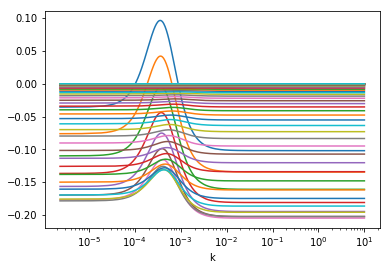

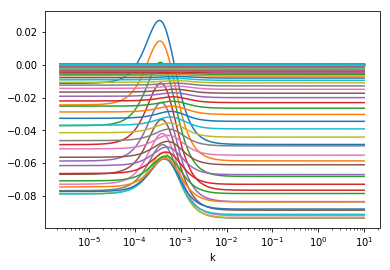

In [10]:
# plot 'em
for zInd,z in enumerate(myPk_w0_upper.zArray):
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()

for zInd,z in enumerate(myPk_w0_upper.zArray):
    plt.semilogx(myPk_w0_lower.kArray,dPdwa[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


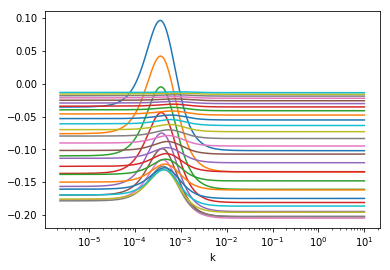

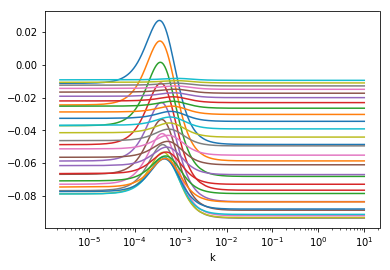

In [11]:
# There's definitely some bump-strangeness going on here.
# look at just below redshift 7
sub7 = np.where(myPk_w0_upper.zArray <= 7)[0]
print sub7

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdwa[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()


[0 1 2 3 4 5 6 7 8 9]


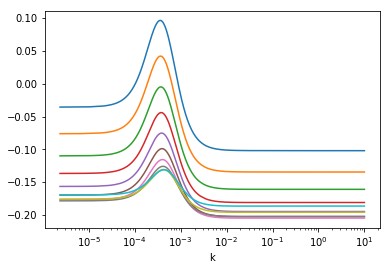

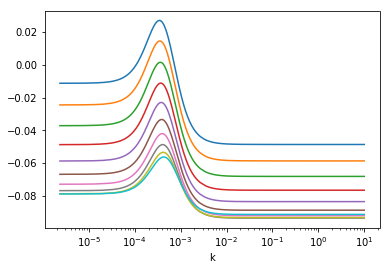

In [12]:
# break it down more
# There's definitely some bump-strangeness going on here.
# look at just below redshift 7
sub7 = np.where(myPk_w0_upper.zArray <= 1)[0]
print sub7

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdwa[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()


[10 11 12 13 14 15]


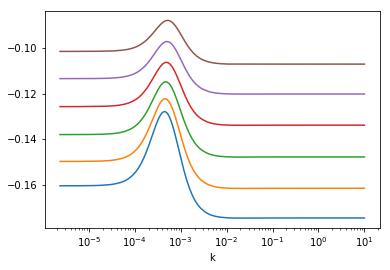

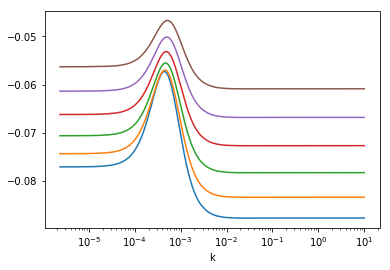

In [13]:
# There's definitely some bump-strangeness going on here.
# look at just below redshift 7
sub7 = np.where(np.abs(myPk_w0_upper.zArray - 1.5) < 0.5)[0]
print sub7

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdwa[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()


[16 17 18 19]


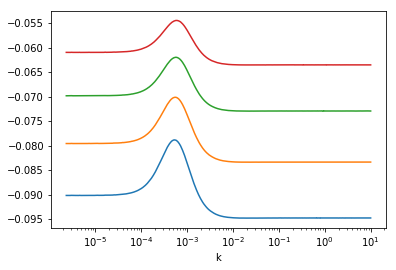

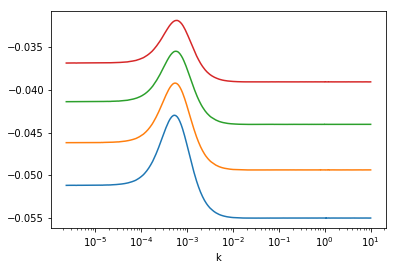

In [14]:
# There's definitely some bump-strangeness going on here.
# look at just below redshift 7
sub7 = np.where(np.abs(myPk_w0_upper.zArray - 2.5) < 0.5)[0]
print sub7

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdwa[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()


[20 21 22]


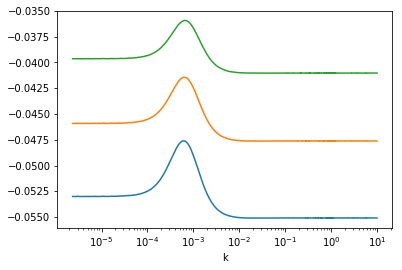

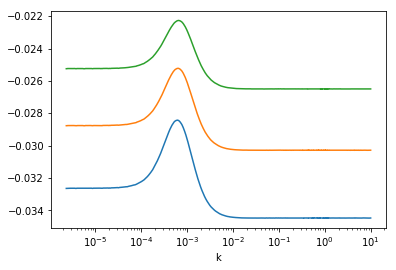

In [15]:
# There's definitely some bump-strangeness going on here.
# look at just below redshift 7
sub7 = np.where(np.abs(myPk_w0_upper.zArray - 3.5) < 0.5)[0]
print sub7

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdwa[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()


[23 24 25 26 27 28 29]


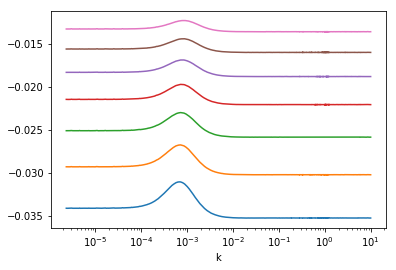

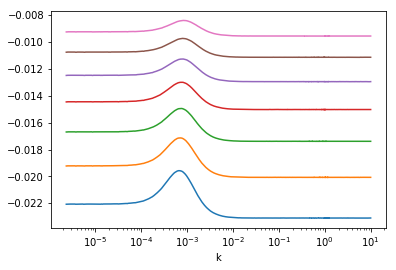

In [16]:
# There's definitely some bump-strangeness going on here.
# look at just below redshift 7
sub7 = np.where(np.abs(myPk_w0_upper.zArray - 5.5) < 1.5)[0]
print sub7

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()

for zInd in sub7:
    plt.semilogx(myPk_w0_lower.kArray,dPdwa[zInd]/Pzk[zInd])
    plt.xlabel('k')
plt.show()


In [17]:
t = dPdw0/Pzk
print t.shape

(100, 1488)


0.0 [0.42369388 0.52791762 0.63977123 0.75981326 0.88864316 1.02690425] 3.108340840393719
[4, 5, 6, 7, 8]


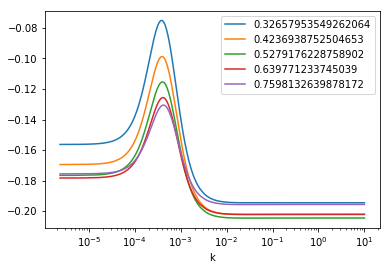

In [18]:
# pick a few for presentation in paper
# find z values
print myPk_w0_upper.zArray[0],myPk_w0_upper.zArray[5:11],myPk_w0_upper.zArray[20]

sub7 = range(4,9)
print sub7

for zInd in sub7:
    #print zInd
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label=myPk_w0_upper.zArray[zInd])
    plt.xlabel('k')
    plt.legend()
plt.show()

[0, 3, 6, 14, 20]


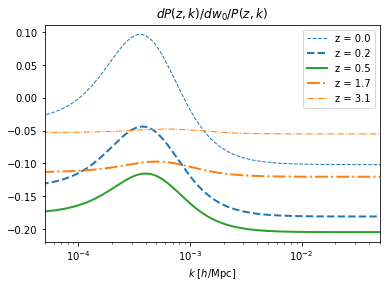

In [19]:
#%matplotlib qt

sub7 = [0,3,6,14,20]
styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

for zNum, zInd in enumerate(sub7):
    #print zInd
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
                linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
plt.xlabel(r'$k$ [$h$/Mpc]')
plt.xlim([5e-5,5e-2])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

In [20]:
# what ell value does that peak project into?
chiOfZ = myPk.getChiofZ()
myZs = [myPk_w0_upper.zArray[zInd] for zInd in sub7]
myChis = chiOfZ(myZs)
print 'zs:   ',myZs
print 'chis: ',myChis

myKs = [1e-4,5e-4,2.5e-3]
for myK in myKs:
    print myK, myChis*myK-0.5

zs:    [0.0, 0.2360896500156815, 0.5279176228758902, 1.6888496990177275, 3.108340840393719]
chis:  [   0.         1003.88380223 2063.20397319 4833.03175764 6620.57790182]
0.0001 [-0.5        -0.39961162 -0.2936796  -0.01669682  0.16205779]
0.0005 [-5.00000000e-01  1.94190112e-03  5.31601987e-01  1.91651588e+00
  2.81028895e+00]
0.0025 [-0.5         2.00970951  4.65800993 11.58257939 16.05144475]


In [21]:
# try different z values:
myZsToPlot = [0.2,0.4,0.8,1.0,2.0,4.0]
myChis = chiOfZ(myZsToPlot)
print 'zs:   ',myZsToPlot
print 'chis: ',myChis

zs:    [0.2, 0.4, 0.8, 1.0, 2.0, 4.0]
chis:  [ 859.2189536  1622.3619519  2891.5804514  3418.06507734 5324.12211493
 7343.78066275]


In [22]:
# project l=30 to k
myChis = chiOfZ(myZsToPlot)
myKlimits = 30.5/myChis
print 'zs:   ',myZsToPlot
print 'chis: ',myChis
print 'ks:   ',myKlimits

zs:    [0.2, 0.4, 0.8, 1.0, 2.0, 4.0]
chis:  [ 859.2189536  1622.3619519  2891.5804514  3418.06507734 5324.12211493
 7343.78066275]
ks:    [0.03549735 0.01879975 0.01054786 0.00892318 0.00572864 0.00415317]


In [23]:
# Those are all way below ell=30.  So this feature does nothing.

In [24]:
# slice the other way
print myPk_w0_lower.kArray.shape
#print myPk_w0_lower.kArray[300:500]
print myPk_w0_lower.kArray[303:308]
print myPk_w0_lower.kArray[346:351]
print myPk_w0_lower.kArray[428:433]
print myPk_w0_lower.kArray[305],myPk_w0_lower.kArray[348],myPk_w0_lower.kArray[430]

(1488,)
[0.04889309 0.04987095 0.05084881 0.05182667 0.05280453]
[0.09824276 0.09946401 0.10068526 0.10190651 0.10312776]
[0.1983852  0.19960645 0.20082769 0.20204894 0.20327018]
0.050848812 0.10068526 0.20082769


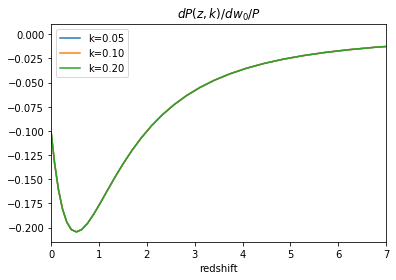

In [25]:
kInds = [305,348,430]
labels = ['k=0.05','k=0.10','k=0.20']
for kNum,kInd in enumerate(kInds):
    plt.plot(myPk_w0_lower.zArray,dPdw0[:,kInd]/Pzk[:,kInd],label=labels[kNum])
plt.xlim([0,7])
plt.xlabel('redshift')
plt.title(r'$dP(z,k)/dw_0/P$')
plt.legend()
plt.show()

In [26]:
# good enough. use index 348 to generate shapeless derivatives.

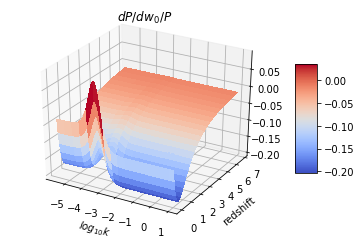

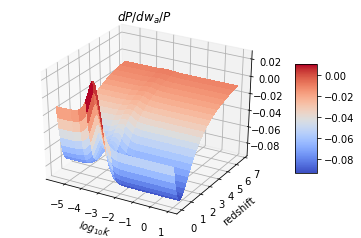

In [27]:
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0/Pzk
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwa/Pzk
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [28]:
# extend dP/dw0/P, dP/dwa/P to higher z, lower k, and higher k
# k direction is easy due to constancy
# z direction needs extrapolation

# create larger arrays
dPdw0_ex = np.empty((np.shape(dPdw0)[0]+1,np.shape(dPdw0)[1]+2))
dPdwa_ex = np.empty((np.shape(dPdwa)[0]+1,np.shape(dPdwa)[1]+2))
myZs = np.empty(np.shape(dPdw0)[0]+1)
myKs = np.empty(np.shape(dPdw0)[1]+2)

# populate them.  start with copy of non-extended area
dPdw0_ex[:-1,1:-1]=dPdw0.copy()/Pzk.copy()
dPdwa_ex[:-1,1:-1]=dPdwa.copy()/Pzk.copy()

# extend to higher redshift
myZmax = 1200
deltaZ = myZmax-myPk_w0_upper.zArray[-1]
dz = myPk_w0_upper.zArray[-1]-myPk_w0_upper.zArray[-2]
for kInd in range(myPk_w0_lower.kArray.__len__()):
    dP0 = dPdw0[-1,kInd]/Pzk[-1,kInd]-dPdw0[-2,kInd]/Pzk[-2,kInd]
    dPa = dPdwa[-1,kInd]/Pzk[-1,kInd]-dPdwa[-2,kInd]/Pzk[-2,kInd]
    dPdw0_ex[-1,kInd+1] = dP0/dz*deltaZ + dPdw0[-1,kInd]/Pzk[-1,kInd]
    dPdwa_ex[-1,kInd+1] = dPa/dz*deltaZ + dPdwa[-1,kInd]/Pzk[-1,kInd]

# copy to wider k-range
dPdw0_ex[:,0] = dPdw0_ex[:,1]  
dPdwa_ex[:,0] = dPdwa_ex[:,1] 
dPdw0_ex[:,-1] = dPdw0_ex[:,-2]  
dPdwa_ex[:,-1] = dPdwa_ex[:,-2] 

myZs[:-1] = myPk_w0_upper.zArray.copy()
myZs[-1] = myZmax
myKs[1:-1] = myPk_w0_lower.kArray.copy()
myKs[0] = 2.0e-6
myKs[-1] = 10.1

print 'done.'





done.


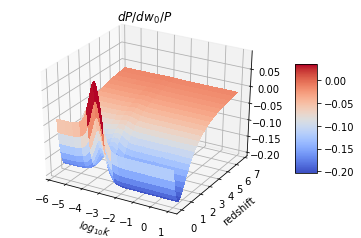

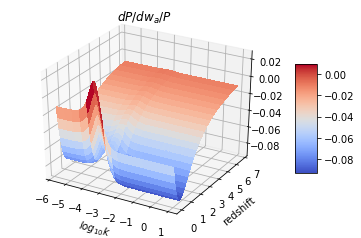

In [29]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLow = 0
zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwa_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()








# flatten this out in k direction

In [30]:
# Now, how to modify P(k,z)?  And how to instert into FisherMatrix?
# Try modifying along k_array and z_array... but they don't match for upper/lower... hm.

# put a wrapper around PK.P
# define a function describing the derivative that I want to flatten

# let g0(k,z): dP(k,z)/dw0*g0(k,z) = f(z) (indep. of k); similar for ga(k,z)
# find average that I want f(z) to be

print dPdw0.shape,dPdwa.shape,Pzk.shape
dPdw0F = dPdw0/Pzk
dPdwaF = dPdwa/Pzk
print dPdw0F.shape,dPdwaF.shape

(100, 1488) (100, 1488) (100, 1488)
(100, 1488) (100, 1488)


In [31]:
# create averages along k-direction
dPdw0F_avg = np.ones(dPdw0F.shape) #*np.average(dPdw0F,axis=1)
dPdwaF_avg = np.ones(dPdwaF.shape) #*np.average(dPdwaF,axis=1)
for zInd in range(100):
    dPdw0F_avg[zInd] *= np.average(dPdw0F[zInd])
    dPdwaF_avg[zInd] *= np.average(dPdwaF[zInd])

print 'done.' 

done.


In [32]:
# use second method with index 348
# plt.plot(myPk_w0_lower.zArray,dPdw0[:,348]/Pzk[:,348])
flatDeriv0 = dPdw0[:,348]/Pzk[:,348]
flatDeriva = dPdwa[:,348]/Pzk[:,348]

dPdw0F_avg2 = np.ones(dPdw0F.shape) 
dPdwaF_avg2 = np.ones(dPdwaF.shape) 
for kInd in range(1488):
    dPdw0F_avg2[:,kInd] *= flatDeriv0
    dPdwaF_avg2[:,kInd] *= flatDeriva
    
print 'done.'

done.


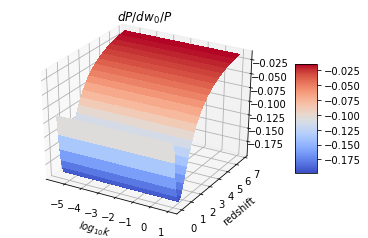

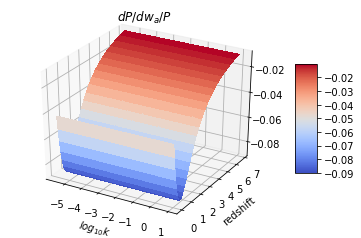

In [33]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0F_avg.copy()
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwaF_avg.copy()
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


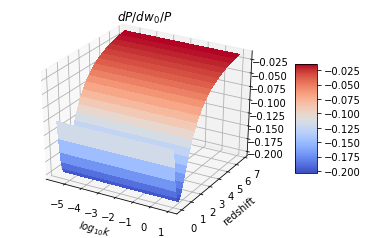

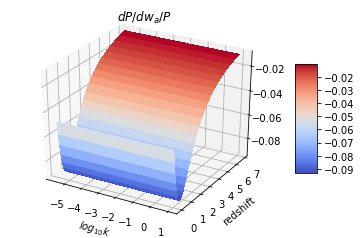

In [34]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0F_avg2.copy()
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwaF_avg2.copy()
toPlot = toPlot[:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [35]:
# create ratios that will do the important work
dPdw0_ratio  = dPdw0F_avg /(dPdw0/Pzk)
dPdwa_ratio  = dPdwaF_avg /(dPdwa/Pzk)
dPdw0_ratio2 = dPdw0F_avg2/(dPdw0/Pzk)
dPdwa_ratio2 = dPdwaF_avg2/(dPdwa/Pzk)

print dPdw0_ratio.shape,  dPdwa_ratio.shape
print dPdw0_ratio2.shape, dPdwa_ratio2.shape

(100, 1488) (100, 1488)
(100, 1488) (100, 1488)


In [36]:
print np.where(myPk_w0_upper.zArray < 0.2)
print np.where(myPk_w0_upper.zArray > 1100)

(array([0, 1, 2]),)
(array([], dtype=int64),)


In [37]:
print np.where(dPdw0_ratio > 100)

(array([ 0,  1, 66, 69, 69, 70, 70, 70, 70, 71, 71, 71, 71, 71, 72, 72, 72,
       72, 72, 73, 73, 73, 74, 74, 75, 75, 75, 75, 76, 76, 76, 77, 82, 82,
       83, 84, 84, 85, 87, 87, 87, 88, 89, 90, 91, 91, 91, 93, 93, 94, 94,
       94, 94, 95, 96, 96, 98, 98, 98]), array([ 113,  131,    7,  385,  616,  444,  721,  888,  956,  560,  863,
       1146, 1301, 1417,  326, 1093, 1327, 1341, 1352,  369,  734, 1277,
        443,  897,  336,  796,  865, 1235, 1099, 1380, 1481,  887,  528,
        730, 1074,  935, 1135,  916,  720, 1062, 1149, 1270,  730,  513,
        279,  791,  922,  754,  799,  176,  255,  514, 1005,  449,  816,
        955,  456,  475,  945]))


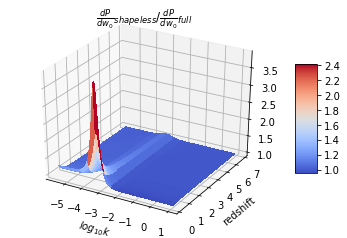

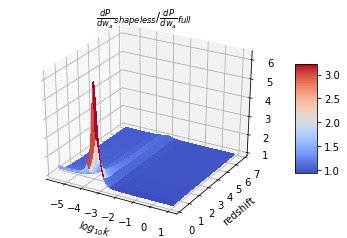

In [38]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1
#zIndLim = -1 #highest z index to plot +1
zIndLow = 3

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0_ratio.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$\frac{dP}{dw_0}_{shapeless}/\frac{dP}{dw_0}_{full}$')
#ax.set_zlim([0,2])

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwa_ratio.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$\frac{dP}{dw_a}_{shapeless}/\frac{dP}{dw_a}_{full}$')
#ax.set_zlim([0,2])

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


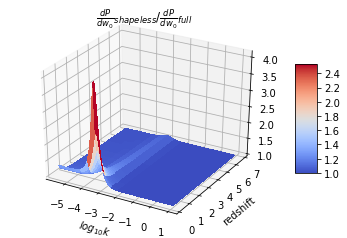

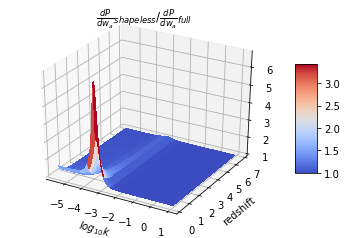

In [39]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1
#zIndLim = -1 #highest z index to plot +1
zIndLow = 3

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0_ratio2.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$\frac{dP}{dw_0}_{shapeless}/\frac{dP}{dw_0}_{full}$')
#ax.set_zlim([0,2])

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwa_ratio2.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myPk_w0_lower.kArray),myPk_w0_upper.zArray[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$\frac{dP}{dw_a}_{shapeless}/\frac{dP}{dw_a}_{full}$')
#ax.set_zlim([0,2])

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [40]:
# that looks good.
# next extrapolate this to higher/lower z/k values and create interpolation function for whole thing
# the points used so far:
print myPk_w0_upper.zArray[0:2],myPk_w0_upper.zArray[-3:-1]
print myPk_w0_lower.kArray[0:2],myPk_w0_lower.kArray[-3:-1]

[0.         0.07320657] [ 945.85257372 1015.16840446]
[2.3507789e-06 2.4304459e-06] [8.62514  9.288299]


In [41]:
# the area I need to cover:

print myPk.zArray.shape,myPk.zArray[0],myPk.zArray[-1]
print myPk_w0_upper.zArray.shape,myPk_w0_upper.zArray[0],myPk_w0_upper.zArray[-1]
print myPk_w0_lower.zArray.shape,myPk_w0_lower.zArray[0],myPk_w0_lower.zArray[-1]
print myPk_wa_upper.zArray.shape,myPk_wa_upper.zArray[0],myPk_wa_upper.zArray[-1]
print myPk_wa_lower.zArray.shape,myPk_wa_lower.zArray[0],myPk_wa_lower.zArray[-1]

print myPk.kArray.shape,myPk.kArray[0],myPk.kArray[-1]
print myPk_w0_upper.kArray.shape,myPk_w0_upper.kArray[0],myPk_w0_upper.kArray[-1]
print myPk_w0_lower.kArray.shape,myPk_w0_lower.kArray[0],myPk_w0_lower.kArray[-1]
print myPk_wa_upper.kArray.shape,myPk_wa_upper.kArray[0],myPk_wa_upper.kArray[-1]
print myPk_wa_lower.kArray.shape,myPk_wa_lower.kArray[0],myPk_wa_lower.kArray[-1]


(100,) 0.0 1088.4400579363114
(100,) 0.0 1089.5586095249687
(100,) 0.0 1089.558861576482
(100,) 0.0 1089.5582050994406
(100,) 0.0 1089.559307779927
(1488,) 2.350779e-06 10.002444
(1488,) 2.3507787e-06 10.002443
(1488,) 2.350779e-06 10.002443
(1488,) 2.350778e-06 10.002443
(1488,) 2.35078e-06 10.002444


In [42]:
print dPdw0_ratio.shape
print dPdwa_ratio.shape
print dPdw0_ratio2.shape
print dPdwa_ratio2.shape

(100, 1488)
(100, 1488)
(100, 1488)
(100, 1488)


In [43]:
# ditch the original ratios and switch to version 2s

In [44]:
# so: extend to higer z, lower k, and higher k
# k direction is easy due to constancy
# z direction needs extrapolation
myZmax = 1200

# measure deltaZ, deltaP
dP0 = dPdw0_ratio2[-1,0]-dPdw0_ratio2[-2,0]
dPa = dPdwa_ratio2[-1,0]-dPdwa_ratio2[-2,0]
dz = myPk_w0_upper.zArray[-1]-myPk_w0_upper.zArray[-2]

# find deltaZ to myZmax
deltaZ = myZmax-myPk_w0_upper.zArray[-1]

# get extrapolated values
extraP0 = dP0/dz*deltaZ + dPdw0F_avg2[-1,0]
extraPa = dPa/dz*deltaZ + dPdwaF_avg2[-1,0]

# create larger arrays
dPdw0F_avg2_ex = np.empty((np.shape(dPdw0F_avg2)[0]+1,np.shape(dPdw0F_avg2)[1]+2))
dPdwaF_avg2_ex = np.empty((np.shape(dPdwaF_avg2)[0]+1,np.shape(dPdwaF_avg2)[1]+2))
myZs = np.empty(np.shape(dPdwaF_avg2)[0]+1)
myKs = np.empty(np.shape(dPdwaF_avg2)[1]+2)

# populate them
#dPdw0F_avg2_ex[:-1,1:-1]=dPdw0F_avg2.copy()
#dPdwaF_avg2_ex[:-1,1:-1]=dPdwaF_avg2.copy()
dPdw0F_avg2_ex[:-1,1:-1]=dPdw0_ratio.copy()
dPdwaF_avg2_ex[:-1,1:-1]=dPdwa_ratio.copy()
for kInd in range(myPk_w0_lower.kArray.__len__()):
    dPdw0F_avg2_ex[-1,kInd+1] = extraP0
    dPdwaF_avg2_ex[-1,kInd+1] = extraPa
dPdw0F_avg2_ex[:,0] = dPdw0F_avg2_ex[:,1]  
dPdwaF_avg2_ex[:,0] = dPdwaF_avg2_ex[:,1] 
dPdw0F_avg2_ex[:,-1] = dPdw0F_avg2_ex[:,-2]  
dPdwaF_avg2_ex[:,-1] = dPdwaF_avg2_ex[:,-2] 

myZs[:-1] = myPk_w0_upper.zArray.copy()
myZs[-1] = myZmax
myKs[1:-1] = myPk_w0_lower.kArray.copy()
myKs[0] = 2.0e-6
myKs[-1] = 10.1

print 'done.'

done.


In [45]:
# extend dP/dw0, dP/dwa to higher z, lower k, and higher k
# k direction is easy due to constancy
# z direction needs extrapolation

# create larger arrays
dPdw0_ex = np.empty((np.shape(dPdw0)[0]+1,np.shape(dPdw0)[1]+2))
dPdwa_ex = np.empty((np.shape(dPdwa)[0]+1,np.shape(dPdwa)[1]+2))
myZs = np.empty(np.shape(dPdw0)[0]+1)
myKs = np.empty(np.shape(dPdw0)[1]+2)

# populate them.  start with copy of non-extended area
dPdw0_ex[:-1,1:-1]=dPdw0.copy()
dPdwa_ex[:-1,1:-1]=dPdwa.copy()

# extend to higher redshift
myZmax = 1200
deltaZ = myZmax-myPk_w0_upper.zArray[-1]
dz = myPk_w0_upper.zArray[-1]-myPk_w0_upper.zArray[-2]
for kInd in range(myPk_w0_lower.kArray.__len__()):
    dP0 = dPdw0[-1,kInd]-dPdw0[-2,kInd]
    dPa = dPdwa[-1,kInd]-dPdwa[-2,kInd]
    dPdw0_ex[-1,kInd+1] = dP0/dz*deltaZ + dPdw0[-1,kInd]
    dPdwa_ex[-1,kInd+1] = dPa/dz*deltaZ + dPdwa[-1,kInd]

# copy to wider k-range
dPdw0_ex[:,0] = dPdw0_ex[:,1]  
dPdwa_ex[:,0] = dPdwa_ex[:,1] 
dPdw0_ex[:,-1] = dPdw0_ex[:,-2]  
dPdwa_ex[:,-1] = dPdwa_ex[:,-2] 

myZs[:-1] = myPk_w0_upper.zArray.copy()
myZs[-1] = myZmax
myKs[1:-1] = myPk_w0_lower.kArray.copy()
myKs[0] = 2.0e-6
myKs[-1] = 10.1

print 'done.'





done.


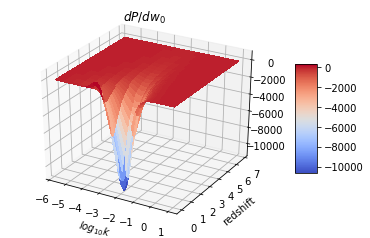

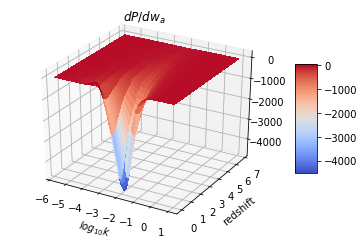

In [46]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLow = 0
zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwa_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()








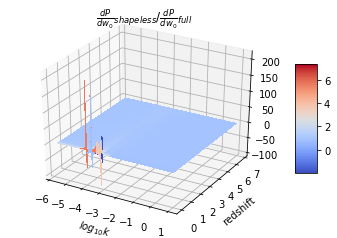

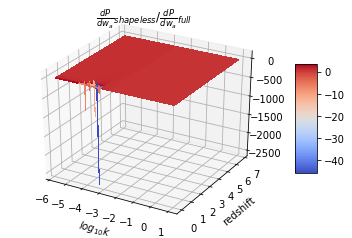

In [47]:
# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0F_avg2_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$\frac{dP}{dw_0}_{shapeless}/\frac{dP}{dw_0}_{full}$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwaF_avg2_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$\frac{dP}{dw_a}_{shapeless}/\frac{dP}{dw_a}_{full}$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [48]:
print dPdw0F_avg2_ex.shape
print dPdwaF_avg2_ex.shape


(101, 1490)
(101, 1490)


In [49]:
# save them for use in 'remake w0, wa' notebook!
np.save('dPdw0_ratio.npy',[myZs, myKs, dPdw0F_avg2_ex])
np.save('dPdwa_ratio.npy',[myZs, myKs, dPdwaF_avg2_ex])


In [50]:
print myZs.shape, myKs.shape, dPdw0F_avg2_ex.shape

(101,) (1490,) (101, 1490)


# Testing for how to really use these ratios

In [51]:
# load data needed for P(z,k) scaling
#myZs, myKs, dPdw0F_avg2_ex = np.load('dPdw0_ratio.npy')
#myZs, myKs, dPdwaF_avg2_ex = np.load('dPdwa_ratio.npy')
print 'done.'

done.


In [52]:
# create interpolation functions for them
from scipy.interpolate import RectBivariateSpline
dPdw0_interp = RectBivariateSpline(myZs,myKs,dPdw0F_avg2_ex)
dPdwa_interp = RectBivariateSpline(myZs,myKs,dPdwaF_avg2_ex)

print 'done.'

done.


In [53]:
# The version of getCl that incorporates this.  Used in notebook "Remake w0 wa derivatives - Force d2P_dwdk to be constant"

from scipy.interpolate import UnivariateSpline

def getCl(myPk,myPk2,myWin,binNum1=0,binNum2=0,cor1=cp.Window.kappa,cor2=cp.Window.kappa,
          lmin=2,lmax=2500,useInterp=True,pName='paramName'):
  """
    Purpose: get angular power spectrum
    Inputs:
      myPk: a MatterPower object; the one for chi(z)
      myPk2: the one that P(k,z) is taken from
      myWin: a Window object that was made with the same MatterPower object (myPk)
      binNum1,binNum2: index indicating which bin to use
        If myWin.dndzMode = 1:
          integer in {0,1,2,3,4,5}
          curves from fig.3 of Crocce et al 2016.
        if myWin.dndzMode = 2:
          integer in {0,1,...,nBins-1,nBins}
        Index=0 indicates sum of all other curves
      cor1,cor2: the names of the two fields to cross-correlate
        must be Window.kappa or Window.galaxies
        Default: Window.kappa
      lmin,lmax: lowest,highest ell to return.
      useInterp: set to true to only do some ell values, and interpolate
        the rest
        Default: True
    Modification:
      Modified to take two input MatterPower objects, and use one for chi(z), the other for P(k,z); ZK, 2018.07.26
    Returns: 
      ell,  the ell values (same length as Cl array)
      Cl, the power spectrum array
  """

  # confirm inputs
  def wincheck(winfunc,num):
    if winfunc == cp.Window.kappa:
      if num == 1:
        print 'window ',num,': kappa ',binNum1
      else:
        print 'window ',num,': kappa ',binNum2
    elif winfunc == cp.Window.galaxies:
      if num == 1:
        print 'window ',num,': galaxies ',binNum1
      else:
        print 'window ',num,': galaxies ',binNum2
    else:
      print 'error with input'
      return 0
    return 1
  
  if wincheck(cor1,1)==0: return 0,0
  if wincheck(cor2,2)==0: return 0,0
  
  # get matter power spectrum P_k^delta
  PK,chistar,chis,dchis,zs,dzs,pars = myPk.getPKinterp()
  PK2,chistar2,chis2,dchis2,zs2,dzs2,pars2 = myPk2.getPKinterp()
    
  # modify PK2 for constant dP/dw0 or constant dP/dwa
  if pName == 'w':
    print 'parameter w0'
    PKmod = lambda z, k : dPdw0_interp(z,k,grid=False)*PK2.P(z,k,grid=False) 
  elif pName == 'wa':
    print 'parameter wa'
    PKmod = lambda z, k : dPdwa_interp(z,k,grid=False)*PK2.P(z,k,grid=False)
  else:
    PKmod = lambda z, k : PK2.P(z,k,grid=False)


  # get window functions
  winFunc1=cor1(myWin,binNum1)
  winFunc2=cor2(myWin,binNum2)
  win1 = winFunc1(zs)
  win2 = winFunc2(zs)

  #Do integral over chi
  if useInterp and lmax <= 3000:
    # define ell values to be used 
    #   (same used in notebook "getCl interpolation testing")
    ells1 = np.arange(10)*2+10
    ells2 = np.arange(4)*5+30
    ells3 = np.arange(5)*10+50
    ells4 = np.arange(20)*25+100
    ells5 = np.arange(20)*70+600
    ells6 = np.arange(11)*100+2000 # switch 11 to 31 to extend from 3000 to 5000
    ellsSet = np.append(ells1,np.append(ells2,np.append(ells3,
        np.append(ells4,np.append(ells5,ells6)))))
    #print 'ell set: ',ellsSet
  else:
    if lmax > 3000:
        print 'warning! lmax>3000 found; Cl interpolation not being done.'
    ellsSet = np.arange(lmin,lmax+1, dtype=np.float64)

  Cells = np.zeros(ellsSet.shape)
  w = np.ones(chis.shape) #this is just used to set to zero k values out of range
  for i, l in enumerate(ellsSet):
    k=(l+0.5)/chis
    w[:]=1
    w[k<1e-4]=0
    w[k>=myPk.kmax]=0
    #Cells[i] = np.dot(dchis, w*PK.P(zs, k, grid=False)*win1*win2/(chis**2))
    Cells[i] = np.dot(dchis, w*PKmod(zs, k)*win1*win2/(chis**2))
    #myPKP = PKmod(zs, k)
    #print 'ell = ',l,', k values: ',k
    #Cells[i] = np.dot(dchis, w*myPKP*win1*win2/(chis**2))

  if useInterp:
    ls = np.arange(lmin,lmax+1, dtype=np.float64)
    y_spl = UnivariateSpline(ellsSet,Cells,s=0,k=4)
    cl = y_spl(ls)   
  else:
    ls = ellsSet
    cl = Cells

  return ls, cl


In [54]:
print 'getting Window object . . . '
myWin = cp.Window(myPk,zmin=0,zmax=7,
                           nBins=16,biasK=cp.ones,biasG=cp.byeBias,
                           dndzMode=2)
                  #,z0=0.3,doNorm=Fobj.doNorm,
                   #        useWk=Fobj.useWk,BPZ=Fobj.BPZ,
                    #       binSmooth=Fobj.binSmooth,biasByBin=Fobj.biasByBin)



print 'done.'

getting Window object . . . 
calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0
binNum:  0 , binBGs:  0.0
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0
binNum:  1 , binBGs:  0.0
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0
binNum:  2 , binBGs:  0.0
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0
binNum:  3 , binBGs:  0.0
calculating window  4 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8. 

In [55]:
print 'getting Cls . . . '
ells,Cls = getCl(myPk,myPk,myWin,binNum1=1,binNum2=1,pName='w')
print 'done.'

getting Cls . . . 
window  1 : kappa  1
window  2 : kappa  1
parameter w0
done.


# Method 2: scale P(k,z) with w, wa instead of calc. and scale

In [56]:
# This time extend smoothed derivatives

# so: extend to higer z, lower k, and higher k
# k direction is easy due to constancy
# z direction needs extrapolation
myZmax = 1200

# measure deltaZ, deltaP
dP0 = dPdw0F_avg2[-1,0]-dPdw0F_avg2[-2,0]
dPa = dPdwaF_avg2[-1,0]-dPdwaF_avg2[-2,0]
#dP0 = dPdw0_ratio[-1,0]-dPdw0_ratio[-2,0]
#dPa = dPdwa_ratio[-1,0]-dPdwa_ratio[-2,0]
dz = myPk_w0_upper.zArray[-1]-myPk_w0_upper.zArray[-2]

# find deltaZ to myZmax
deltaZ = myZmax-myPk_w0_upper.zArray[-1]

# get extrapolated values
extraP0 = dP0/dz*deltaZ + dPdw0F_avg2[-1,0]
extraPa = dPa/dz*deltaZ + dPdwaF_avg2[-1,0]

# create larger arrays
dPdw0F_avg2_ex = np.empty((np.shape(dPdw0F_avg2)[0]+1,np.shape(dPdw0F_avg2)[1]+2))
dPdwaF_avg2_ex = np.empty((np.shape(dPdwaF_avg2)[0]+1,np.shape(dPdwaF_avg2)[1]+2))
myZs = np.empty(np.shape(dPdwaF_avg2)[0]+1)
myKs = np.empty(np.shape(dPdwaF_avg2)[1]+2)

# populate them
dPdw0F_avg2_ex[:-1,1:-1]=dPdw0F_avg2.copy()
dPdwaF_avg2_ex[:-1,1:-1]=dPdwaF_avg2.copy()
#dPdw0F_avg2_ex[:-1,1:-1]=dPdw0_ratio.copy()
#dPdwaF_avg2_ex[:-1,1:-1]=dPdwa_ratio.copy()
for kInd in range(myPk_w0_lower.kArray.__len__()):
    dPdw0F_avg2_ex[-1,kInd+1] = extraP0
    dPdwaF_avg2_ex[-1,kInd+1] = extraPa
dPdw0F_avg2_ex[:,0] = dPdw0F_avg2_ex[:,1]  
dPdwaF_avg2_ex[:,0] = dPdwaF_avg2_ex[:,1] 
dPdw0F_avg2_ex[:,-1] = dPdw0F_avg2_ex[:,-2]  
dPdwaF_avg2_ex[:,-1] = dPdwaF_avg2_ex[:,-2] 

myZs[:-1] = myPk_w0_upper.zArray.copy()
myZs[-1] = myZmax
myKs[1:-1] = myPk_w0_lower.kArray.copy()
myKs[0] = 2.0e-6
myKs[-1] = 10.1

print 'done.'





done.


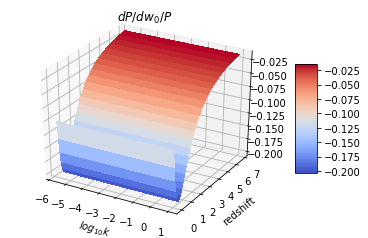

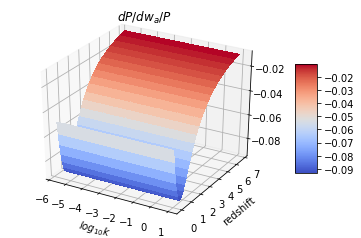

In [57]:


# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1

fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0F_avg2_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwaF_avg2_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()








In [58]:
print dPdw0F_avg2_ex.shape
print dPdwaF_avg2_ex.shape
print myZs.shape, myKs.shape

(101, 1490)
(101, 1490)
(101,) (1490,)


In [59]:
# save them for use in 'remake w0, wa' notebook!
np.save('dPdw0_avg_ex.npy',[myZs, myKs, dPdw0F_avg2_ex])
np.save('dPdwa_avg_ex.npy',[myZs, myKs, dPdwaF_avg2_ex])
print 'done.'

done.


In [60]:
# create interpolation functions for them
from scipy.interpolate import RectBivariateSpline
dPdw0_interp = RectBivariateSpline(myZs,myKs,dPdw0F_avg2_ex)
dPdwa_interp = RectBivariateSpline(myZs,myKs,dPdwaF_avg2_ex)

print 'done.'

done.


In [61]:
# create interpolation functions for them
# _ws means 'with shape', since the other version is shapeless
from scipy.interpolate import RectBivariateSpline
dPdw0_interp_ws = RectBivariateSpline(myZs,myKs,dPdw0_ex)
dPdwa_interp_ws = RectBivariateSpline(myZs,myKs,dPdwa_ex)

print 'done.'

done.


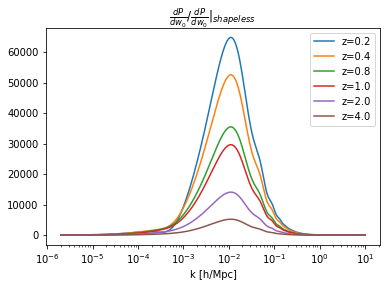

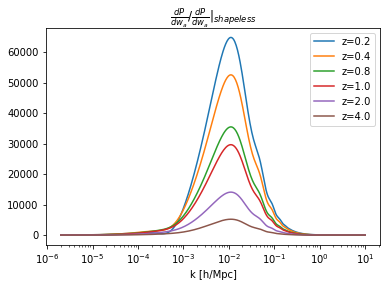

In [62]:
# testing how I might use these:
# Plot dP(k)/dw|full / dP(k)/dw|shapeless at several z-values

myZsToPlot = [0.2,0.4,0.8,1.0,2.0,4.0]
labels = ['z=0.2','z=0.4','z=0.8','z=1.0','z=2.0','z=4.0']
for zNum,myZ in enumerate(myZsToPlot):
    dPdw0_fullovershapeless = dPdw0_interp_ws(myZ,myKs)/dPdw0_interp(myZ,myKs)
    plt.semilogx(myKs,dPdw0_fullovershapeless.T,label=labels[zNum])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_0} / \frac{dP}{dw_0} |_{shapeless}$')
plt.show()

for zNum,myZ in enumerate(myZsToPlot):
    dPdwa_fullovershapeless = dPdwa_interp_ws(myZ,myKs)/dPdwa_interp(myZ,myKs)
    plt.semilogx(myKs,dPdwa_fullovershapeless.T,label=labels[zNum])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_a} / \frac{dP}{dw_a} |_{shapeless}$')
plt.show()


    

In [63]:
print myKs[253],myKs[390]

0.010439983569085598 0.15075647830963135


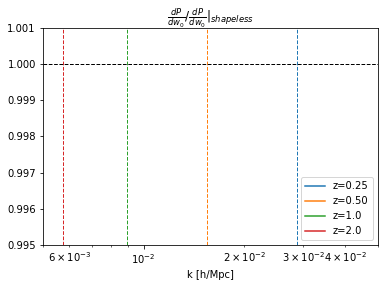

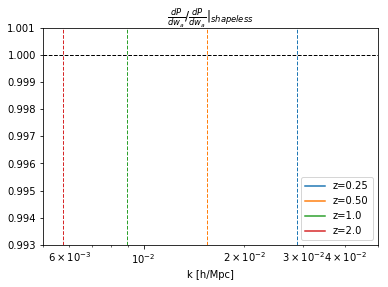

In [64]:
%matplotlib inline

#myZsToPlot = [0.2,0.4,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
#labels = ['z=0.2','z=0.4','z=0.8','z=1.0','z=1.2','z=1.4','z=1.6','z=1.8','z=2.0']

#myZsToPlot = [0.25,0.5,1.0,1.5,2.0,2.5,3.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=1.5','z=2.0','z=2.5','z=3.0']

myZsToPlot = [0.25,0.5,1.0,2.0]
labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
colors = ['C0','C1','C2','C3']

# project l=30 to k
myChis = chiOfZ(myZsToPlot)
myKlimits = 30.5/myChis

for zNum,myZ in enumerate(myZsToPlot):
    dPdw0_fullovershapeless = dPdw0_interp_ws(myZ,myKs[223:390])/dPdw0_interp(myZ,myKs[223:390])
    plt.semilogx(myKs[223:390],dPdw0_fullovershapeless.T,label=labels[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.axhline(y=1,color='k',linestyle='--',linewidth=1)
plt.xlim([5e-3,5e-2])
plt.ylim([0.995,1.0010])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_0} / \frac{dP}{dw_0} |_{shapeless}$')
plt.show()

for zNum,myZ in enumerate(myZsToPlot):
    dPdwa_fullovershapeless = dPdwa_interp_ws(myZ,myKs[223:390])/dPdwa_interp(myZ,myKs[223:390])
    plt.semilogx(myKs[223:390],dPdwa_fullovershapeless.T,label=labels[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.axhline(y=1,color='k',linestyle='--',linewidth=1)
plt.xlim([5e-3,5e-2])
plt.ylim([0.993,1.0010])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_a} / \frac{dP}{dw_a} |_{shapeless}$')
plt.show()


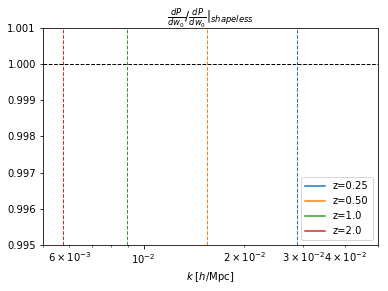

In [65]:
#%matplotlib qt
colors = ['C0','C1','C2','C3']
for zNum,myZ in enumerate(myZsToPlot):
    dPdw0_fullovershapeless = dPdw0_interp_ws(myZ,myKs[223:390])/dPdw0_interp(myZ,myKs[223:390])
    plt.semilogx(myKs[223:390],dPdw0_fullovershapeless.T,label=labels[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.axhline(y=1,color='k',linestyle='--',linewidth=1)
plt.xlim([5e-3,5e-2])
plt.ylim([0.995,1.0010])
plt.legend()
plt.xlabel(r'$k$ [$h$/Mpc]')
plt.title(r'$\frac{dP}{dw_0} / \frac{dP}{dw_0} |_{shapeless}$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in divide
  # This is added back by InteractiveShellApp.init_path()


[0, 3, 6, 14, 20]


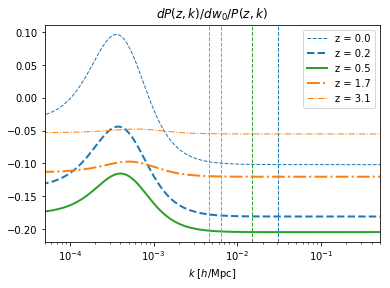

In [66]:
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [0,3,6,14,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

for zNum, zInd in enumerate(sub7):
    #print zInd
    plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
                linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
plt.xlim([5e-5,5e-1])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

In [67]:
print myPk_w0_upper.zArray[sub7]
print myPk_w0_upper.zArray[6:15]
print myPk_w0_upper.zArray[15:21]


[0.         0.23608965 0.52791762 1.6888497  3.10834084]
[0.52791762 0.63977123 0.75981326 0.88864316 1.02690425 1.17528696
 1.33453226 1.50543537 1.6888497 ]
[1.88569117 2.09694272 2.32365928 2.56697298 2.82809885 3.10834084]


[0, 3, 6, 14, 20]


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':


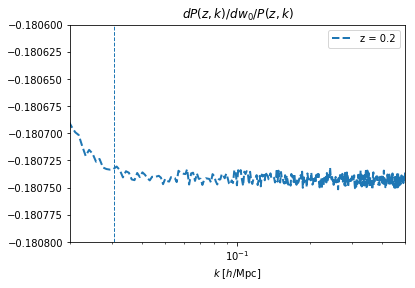

In [68]:
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [0,3,6,14,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

#for zNum, zInd in enumerate(sub7):
zNum=1
zInd=sub7[zNum]
#print zInd
plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
            linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
#plt.xlim([5e-5,5e-1])
plt.xlim([2e-2,5e-1])
plt.ylim([-0.1808,-0.1806])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':


[0, 3, 6, 14, 20]


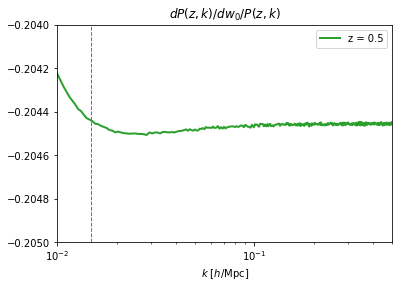

In [69]:
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [0,3,6,14,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

#for zNum, zInd in enumerate(sub7):
zNum=2
zInd=sub7[zNum]
#print zInd
plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
            linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
#plt.xlim([5e-5,5e-1])
plt.xlim([1e-2,5e-1])
plt.ylim([-0.205,-0.204])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':


[0, 3, 6, 14, 20]


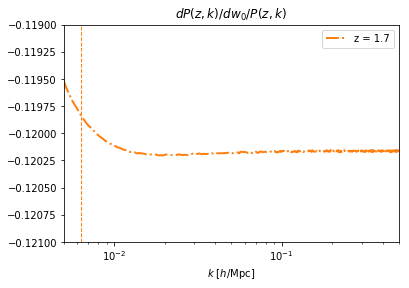

In [70]:
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [0,3,6,14,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

#for zNum, zInd in enumerate(sub7):
zNum=3
zInd=sub7[zNum]
#print zInd
plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
            linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
#plt.xlim([5e-5,5e-1])
plt.xlim([5e-3,5e-1])
plt.ylim([-0.121,-0.119])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in divide
  if sys.path[0] == '':


[0, 3, 6, 14, 20]


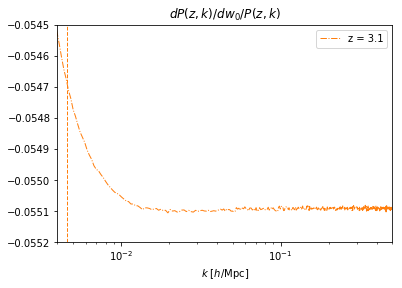

In [71]:
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [0,3,6,14,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

#for zNum, zInd in enumerate(sub7):
zNum=4
zInd=sub7[zNum]
#print zInd
plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
            linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
plt.xlim([5e-5,5e-1])
plt.xlim([4e-3,5e-1])
plt.ylim([-0.0552,-0.0545])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in divide
  del sys.path[0]


[0, 3, 6, 13, 20]


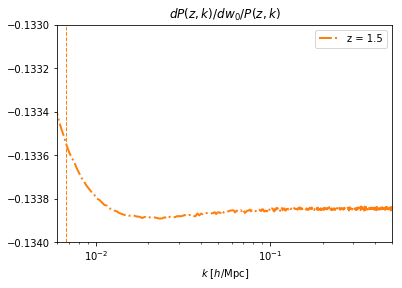

In [72]:
# try z=1.5
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [0,3,6,13,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

#for zNum, zInd in enumerate(sub7):
zNum=3
zInd=sub7[zNum]
#print zInd
plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
            linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
#plt.xlim([5e-5,5e-1])
plt.xlim([6e-3,5e-1])
plt.ylim([-0.134,-0.133])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in divide
  del sys.path[0]


[0, 3, 6, 10, 20]


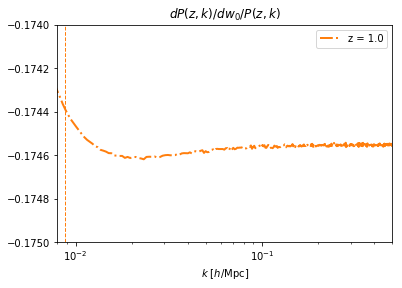

In [73]:
# try z=1.0
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [0,3,6,10,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['--','--','-','-.','-.']
thicks = [1,2,2,2,1]
colors = ['C0','C0','C2','C1','C1']
print sub7

#for zNum, zInd in enumerate(sub7):
zNum=3
zInd=sub7[zNum]
#print zInd
plt.semilogx(myPk_w0_lower.kArray,dPdw0[zInd]/Pzk[zInd],label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
            linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
#plt.xlim([5e-5,5e-1])
plt.xlim([8e-3,5e-1])
plt.ylim([-0.175,-0.174])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k)$')
plt.show()

In [74]:
# find index for k=0.1
print myPk_w0_lower.kArray[345:350]
print myPk_w0_lower.kArray[348]

[0.09702151 0.09824276 0.09946401 0.10068526 0.10190651]
0.10068526


[6, 10, 13, 20]
[0.01478283 0.0087538  0.00676864 0.00460685]


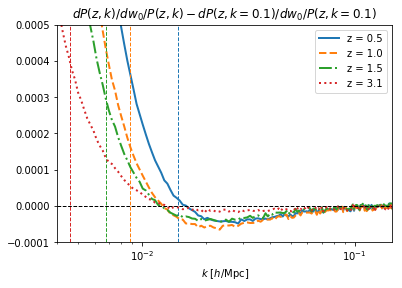

In [75]:
# plot at 0.5,1.0, and 1.5 but subtract off value at k=0.1 so they all go on same plot
# try z=1.0
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [6,10,13,20]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['-','--','-.',':','-.']
#thicks = [1,1,1,1,1]
thicks = [2,2,2,2,2]
colors = ['C0','C1','C2','C3','C4']
print sub7
print myKlimits
kIndex = 348

for zNum, zInd in enumerate(sub7):
#zNum=3
#zInd=sub7[zNum]
#print zInd

    # subtract off the values at k=0.1
    toPlot = dPdw0[zInd]/Pzk[zInd] - dPdw0[zInd,kIndex]/Pzk[zInd,kIndex]
    plt.semilogx(myPk_w0_lower.kArray,toPlot,label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
                linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]')
plt.axhline(y=0,color='k',linestyle='--',linewidth=1)
#plt.xlim([5e-5,5e-1])
plt.xlim([4e-3,1.5e-1])
plt.ylim([-0.0001,0.0005])
plt.legend()
plt.title(r'$dP(z,k)/dw_0/P(z,k) - dP(z,k=0.1)/dw_0/P(z,k=0.1)$')
plt.show()

[6, 10, 13]
[0.01478283 0.0087538  0.00676864]


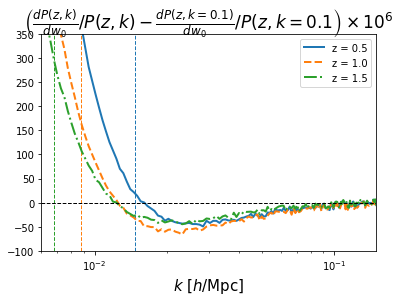

In [76]:
#%matplotlib qt
# plot at 0.5,1.0, and 1.5 but subtract off value at k=0.1 so they all go on same plot
# try z=1.0
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [6,10,13]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['-','--','-.',':','-.']
#thicks = [1,1,1,1,1]
thicks = [2,2,2,2,2]
colors = ['C0','C1','C2','C3','C4']
print sub7
print myKlimits
kIndex = 348

for zNum, zInd in enumerate(sub7):
#zNum=3
#zInd=sub7[zNum]
#print zInd

    # subtract off the values at k=0.1
    toPlot = dPdw0[zInd]/Pzk[zInd] - dPdw0[zInd,kIndex]/Pzk[zInd,kIndex]
    plt.semilogx(myPk_w0_lower.kArray,toPlot*1e6,label='z = {:02.1f}'.format(myPk_w0_upper.zArray[zInd]),
                linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]',fontsize=15)
plt.axhline(y=0,color='k',linestyle='--',linewidth=1)
#plt.xlim([5e-5,5e-1])
plt.xlim([6e-3,1.5e-1])
plt.ylim([-0.0001,0.00035])
plt.ylim([-100,350])
plt.legend()
#plt.title(r'$dP(z,k)/dw_0/P(z,k) - dP(z,k=0.1)/dw_0/P(z,k=0.1)$',fontsize=15)
plt.title(r'$\left(\frac{dP(z,k)}{dw_0}/P(z,k) - \frac{dP(z,k=0.1)}{dw_0}/P(z,k=0.1\right)\times 10^6$',fontsize=17)
plt.show()

[6, 10, 13]
[0.01478283 0.0087538  0.00676864]


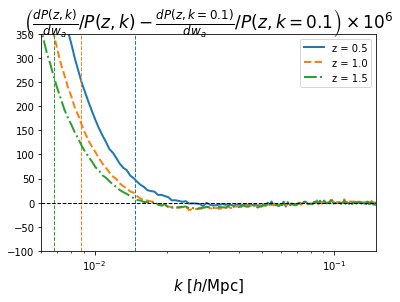

In [88]:
# modify for w_a
%matplotlib inline
# plot at 0.5,1.0, and 1.5 but subtract off value at k=0.1 so they all go on same plot
# try z=1.0
# zoom to one of them
#%matplotlib qt

#myZsToPlot = [0.25,0.5,1.0,2.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=2.0']
#colors = ['C0','C1','C2','C3']

sub7 = [6,10,13]

# project l=30 to k
myChis = chiOfZ(myPk_w0_upper.zArray[sub7])
myKlimits = 30.5/myChis

styles = ['-','--','-.',':','-.']
#thicks = [1,1,1,1,1]
thicks = [2,2,2,2,2]
colors = ['C0','C1','C2','C3','C4']
print sub7
print myKlimits
kIndex = 348

for zNum, zInd in enumerate(sub7):
#zNum=3
#zInd=sub7[zNum]
#print zInd

    # subtract off the values at k=0.1
    toPlot = dPdwa[zInd]/Pzk[zInd] - dPdwa[zInd,kIndex]/Pzk[zInd,kIndex]
    plt.semilogx(myPk_wa_lower.kArray,toPlot*1e6,label='z = {:02.1f}'.format(myPk_wa_upper.zArray[zInd]),
                linestyle=styles[zNum],linewidth=thicks[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.xlabel(r'$k$ [$h$/Mpc]',fontsize=15)
plt.axhline(y=0,color='k',linestyle='--',linewidth=1)
#plt.xlim([5e-5,5e-1])
plt.xlim([6e-3,1.5e-1])
#plt.ylim([-0.0001,0.00035])
plt.ylim([-100,350])
plt.legend()
#plt.title(r'$dP(z,k)/dw_0/P(z,k) - dP(z,k=0.1)/dw_0/P(z,k=0.1)$',fontsize=15)
plt.title(r'$\left(\frac{dP(z,k)}{dw_a}/P(z,k) - \frac{dP(z,k=0.1)}{dw_a}/P(z,k=0.1\right)\times 10^6$',fontsize=17)
plt.show()

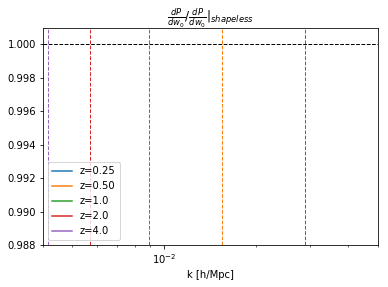

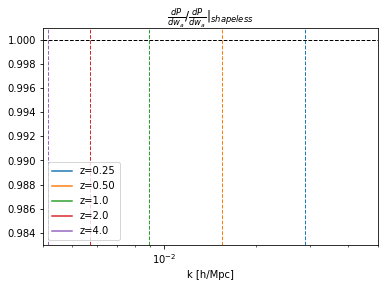

In [77]:
%matplotlib inline

#myZsToPlot = [0.2,0.4,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
#labels = ['z=0.2','z=0.4','z=0.8','z=1.0','z=1.2','z=1.4','z=1.6','z=1.8','z=2.0']

#myZsToPlot = [0.25,0.5,1.0,1.5,2.0,2.5,3.0]
#labels = ['z=0.25','z=0.50','z=1.0','z=1.5','z=2.0','z=2.5','z=3.0']

myZsToPlot = [0.25,0.5,1.0,2.0,4.0]
labels = ['z=0.25','z=0.50','z=1.0','z=2.0','z=4.0']
colors = ['C0','C1','C2','C3','C4']

# project l=30 to k
myChis = chiOfZ(myZsToPlot)
myKlimits = 30.5/myChis

for zNum,myZ in enumerate(myZsToPlot):
    dPdw0_fullovershapeless = dPdw0_interp_ws(myZ,myKs[223:390])/dPdw0_interp(myZ,myKs[223:390])
    plt.semilogx(myKs[223:390],dPdw0_fullovershapeless.T,label=labels[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.axhline(y=1,color='k',linestyle='--',linewidth=1)
plt.xlim([4e-3,5e-2])
plt.ylim([0.988,1.0010])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_0} / \frac{dP}{dw_0} |_{shapeless}$')
plt.show()

for zNum,myZ in enumerate(myZsToPlot):
    dPdwa_fullovershapeless = dPdwa_interp_ws(myZ,myKs[223:390])/dPdwa_interp(myZ,myKs[223:390])
    plt.semilogx(myKs[223:390],dPdwa_fullovershapeless.T,label=labels[zNum],color=colors[zNum])
    plt.axvline(x=myKlimits[zNum],color=colors[zNum],linestyle='--',linewidth=1)
plt.axhline(y=1,color='k',linestyle='--',linewidth=1)
plt.xlim([4e-3,5e-2])
plt.ylim([0.983,1.0010])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_a} / \frac{dP}{dw_a} |_{shapeless}$')
plt.show()


IndexError: index 5 is out of bounds for axis 0 with size 5

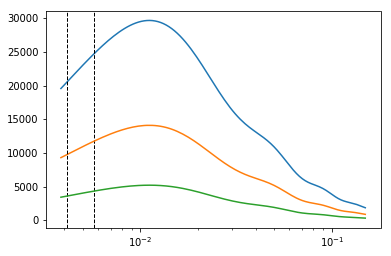

In [78]:

#myZsToPlot = [0.2,0.4,0.8,1.0,2.0,4.0]
myZsToPlot = [1.0,2.0,4.0]
labels = ['z=0.2','z=0.4','z=0.8','z=1.0','z=2.0','z=4.0']
for zNum,myZ in enumerate(myZsToPlot):
    dPdw0_fullovershapeless = dPdw0_interp_ws(myZ,myKs[223:390])/dPdw0_interp(myZ,myKs[223:390])
    plt.semilogx(myKs[223:390],dPdw0_fullovershapeless.T,label=labels[zNum+3])
    plt.axvline(x=myKlimits[zNum+3],color='k',linestyle='--',linewidth=1)
plt.xlim([3.5e-3,2e-2])
plt.ylim([0.988,1.0010])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_0} / \frac{dP}{dw_0} |_{shapeless}$')
plt.show()

for zNum,myZ in enumerate(myZsToPlot):
    dPdwa_fullovershapeless = dPdwa_interp_ws(myZ,myKs[223:390])/dPdwa_interp(myZ,myKs[223:390])
    plt.semilogx(myKs[223:390],dPdwa_fullovershapeless.T,label=labels[zNum+3])
    plt.axvline(x=myKlimits[zNum+3],color='k',linestyle='--',linewidth=1)
plt.xlim([3.5e-3,2e-2])
plt.ylim([0.985,1.0010])
plt.legend()
plt.xlabel('k [h/Mpc]')
plt.title(r'$\frac{dP}{dw_a} / \frac{dP}{dw_a} |_{shapeless}$')
plt.show()


# Medthod 3: Multiplicative. Let $P(k,z;w+\Delta w) = P(k,z;w) \times DW(z,\Delta w)$

In [ ]:
# get upper, lower, and fiducial P(k,z) for w0, wa
# need to have run everyghing up through "get perturbed matter power spectra and build derivatives"

# the upper PKs have lower z_max than lower PKs
# the lower PKs have higher k_min and le k_max than upper
dPdw0_upper = myPk_w0_upper.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)
dPdw0_lower = myPk_w0_lower.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)
dPdwa_upper = myPk_wa_upper.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)
dPdwa_lower = myPk_wa_lower.PK.P(myPk_w0_upper.zArray,myPk_w0_lower.kArray)
Pzk         = myPk.PK.P(         myPk_w0_upper.zArray,myPk_w0_lower.kArray)

print 'done.'

In [ ]:
# derive power ratio (DW) functions from differences
dw0U = dPdw0_upper/Pzk
dw0L = Pzk/dPdw0_lower
dwaU = dPdwa_upper/Pzk
dwaL = Pzk/dPdwa_lower

# average the two sides
dw0 = (dw0U+dw0L)/2.
dwa = (dwaU+dwaL)/2.

print dw0.shape,dwa.shape



In [ ]:
# create averages along k-direction
dw0_avg = np.ones(dw0.shape)
dwa_avg = np.ones(dwa.shape)
for zInd in range(100):
    dw0_avg[zInd] *= np.average(dw0[zInd])
    dwa_avg[zInd] *= np.average(dwa[zInd])

print 'done.' 

In [ ]:
# plot them
myZs = myPk_w0_upper.zArray
plt.plot(myZs,dw0_avg[:,0],label='w0')
plt.plot(myZs,dwa_avg[:,0],label='wa')
plt.show()

plt.semilogx(myZs,dw0_avg[:,0],label='w0')
plt.semilogx(myZs,dwa_avg[:,0],label='wa')
plt.show()

In [ ]:
# This time extend power ratios

# so: extend to higer z, lower k, and higher k
# k direction is easy due to constancy
# z direction needs extrapolation
myZmax = 1200

# change names
dPdw0F_avg = dw0_avg
dPdwaF_avg = dwa_avg

# measure deltaZ, deltaP
dP0 = dPdw0F_avg[-1,0]-dPdw0F_avg[-2,0]
dPa = dPdwaF_avg[-1,0]-dPdwaF_avg[-2,0]
#dP0 = dPdw0_ratio[-1,0]-dPdw0_ratio[-2,0]
#dPa = dPdwa_ratio[-1,0]-dPdwa_ratio[-2,0]
dz = myPk_w0_upper.zArray[-1]-myPk_w0_upper.zArray[-2]

# find deltaZ to myZmax
deltaZ = myZmax-myPk_w0_upper.zArray[-1]

# get extrapolated values
extraP0 = dP0/dz*deltaZ + dPdw0F_avg[-1,0]
extraPa = dPa/dz*deltaZ + dPdwaF_avg[-1,0]

# create larger arrays
dPdw0F_avg_ex = np.empty((np.shape(dPdw0F_avg)[0]+1,np.shape(dPdw0F_avg)[1]+2))
dPdwaF_avg_ex = np.empty((np.shape(dPdwaF_avg)[0]+1,np.shape(dPdwaF_avg)[1]+2))
myZs = np.empty(np.shape(dPdwaF_avg)[0]+1)
myKs = np.empty(np.shape(dPdwaF_avg)[1]+2)

# populate them
dPdw0F_avg_ex[:-1,1:-1]=dPdw0F_avg.copy()
dPdwaF_avg_ex[:-1,1:-1]=dPdwaF_avg.copy()
#dPdw0F_avg_ex[:-1,1:-1]=dPdw0_ratio.copy()
#dPdwaF_avg_ex[:-1,1:-1]=dPdwa_ratio.copy()
for kInd in range(myPk_w0_lower.kArray.__len__()):
    dPdw0F_avg_ex[-1,kInd+1] = extraP0
    dPdwaF_avg_ex[-1,kInd+1] = extraPa
dPdw0F_avg_ex[:,0] = dPdw0F_avg_ex[:,1]  
dPdwaF_avg_ex[:,0] = dPdwaF_avg_ex[:,1] 
dPdw0F_avg_ex[:,-1] = dPdw0F_avg_ex[:,-2]  
dPdwaF_avg_ex[:,-1] = dPdwaF_avg_ex[:,-2] 

myZs[:-1] = myPk_w0_upper.zArray.copy()
myZs[-1] = myZmax
myKs[1:-1] = myPk_w0_lower.kArray.copy()
myKs[0] = 2.0e-6
myKs[-1] = 10.1

print 'done.'





In [ ]:


# check this
# try surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

zIndLim = 30 #highest z index to plot +1
#zIndLim = -1 #highest z index to plot +1
zIndLow = 3


fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdw0F_avg_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dw0/P')
ax.set_title(r'$dP/dw_0/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



fig = plt.figure()
ax = fig.gca(projection='3d')
toPlot = dPdwaF_avg_ex.copy()
toPlot = toPlot[zIndLow:zIndLim]
#print toPlot.shape

X, Y = np.meshgrid(np.log10(myKs),myZs[zIndLow:zIndLim])
Z = toPlot.reshape(X.shape)
#print Z.shape
surf = ax.plot_surface(X,Y,Z,
                cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$log_{10} k$')
ax.set_ylabel('redshift')
#ax.set_zlabel('dP/dwa/P')
ax.set_title(r'$dP/dw_a/P$')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()








In [ ]:
print dPdw0F_avg_ex.shape
print dPdwaF_avg_ex.shape
print myZs.shape, myKs.shape

In [ ]:
# save them for use in 'remake w0, wa' notebook!
np.save('dw0_avg_ex.npy',[myZs, myKs, dPdw0F_avg_ex])
np.save('dwa_avg_ex.npy',[myZs, myKs, dPdwaF_avg_ex])
print 'done.'